# МАТЕМАТИЧНЕ МОДЕЛЮВАННЯ МАТЕРІАЛІВ ТА ТЕХНОЛОГІЧНИХ ПРОЦЕСІВ В МАТЕРІАЛОЗНАВСТВІ
Комп'ютерний практикум

*Виконав студент групи ФМ-71мп*

*Богомаз Ростислав*

## 4. ІДЕНТИФІКАЦІЙНІ МАТЕМАТИЧНІ МОДЕЛІ. МЕТОД НАЙМЕНШИХ КВАДРАТІВ

**Мета роботи:** освоєння комп’ютерної реалізації багатовимірного методу
найменших квадратів для побудови ідентифікаційних регресійних математичних моделей.

### Матеріали

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline

### Завдання та вихідні дані
Побудувати математичну модель, використовуючи дані багатофакторного
експерименту і методику покрокового регресійного аналізу, яка базується на
багатовимірному варіанті методу найменших квадратів. Визначити адекватність моделі.

In [2]:
df = pd.read_csv('data.mnk', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'])
df

,X1,X2,X3,X4,X5,X6,Y
0,0.21,0.79,0.20,0.65,1.65,0.07,70
1,0.20,1.10,0.80,0.74,1.51,0.12,73
2,0.19,0.65,1.05,0.87,1.89,0.06,73
3,0.26,0.55,0.39,0.68,1.48,0.15,78
4,0.30,0.59,0.45,0.82,1.18,0.03,80
5,0.18,0.64,0.61,0.91,1.20,0.09,77
6,0.20,0.60,0.63,1.05,1.18,0.00,85
7,0.21,0.58,0.81,0.73,1.54,0.04,73
8,0.25,0.55,0.76,0.92,1.36,0.14,90
9,0.19,1.05,0.44,1.22,1.00,0.00,88


### Порядок виконання

Розмічаємо дані на фактори (матриця `X`) та результат (массив `y`).

In [3]:
X = df.iloc[:, df.columns != 'Y']
y = df['Y']

Проводимо кореляційний аналіз:

In [4]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,-0.269127,0.224985,-0.258515,-0.034934,-0.016117,-0.155057
X2,-0.269127,1.000000,-0.046189,0.056107,-0.182688,-0.223716,-0.022913
X3,0.224985,-0.046189,1.000000,-0.102816,0.204957,0.009477,-0.043821
X4,-0.258515,0.056107,-0.102816,1.000000,-0.189146,-0.309623,0.381760
X5,-0.034934,-0.182688,0.204957,-0.189146,1.000000,0.029154,-0.337563
X6,-0.016117,-0.223716,0.009477,-0.309623,0.029154,1.000000,-0.144291
Y,-0.155057,-0.022913,-0.043821,0.381760,-0.337563,-0.144291,1.000000


Властивості X1, Х2, Х3 та Х6 мають низький коефіцієнт кореляції тому такі властивості можемо виключити з регресійного аналізу.

In [5]:
Xreduced = X.drop(['X1', 'X2', 'X3', 'X6'], axis=1)

Створюємо дві регресійні моделі для всіх факторів, та для відсортованих по коефіцієнту кореляції:

In [6]:
regressor = LinearRegression()
regressor.fit(Xreduced, y)

regressor_full = LinearRegression()
regressor_full.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Визначимо кореляцію між відгуками моделей і експериментальними даними.

In [7]:
R = regressor.score(Xreduced, y)
Rfull = regressor_full.score(X, y)
Latex(f'$R_1^2 = {R:.2f},\\\ R_2^2 = {Rfull:.2f}$')

<IPython.core.display.Latex object>

Робимо висновок, що застосовувати в даному випадку лінійну регресію недоцільно. Додамо в матрицю фактори взаємодії типу $x_i \dot{} x_j$

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
Xnew = poly.fit_transform(X)

Отримуємо кількість факторів 21:

In [9]:
Xnew.shape[1]

21

Маючи окрім вихідних факторів фактори взаємодії побудуємо квазі-лінійну регрессію. Проведемо корреляційний аналіз факторів:

In [10]:
%precision 2
r = np.corrcoef(Xnew.T, y)[:-1, -1]
r

array([-0.16, -0.02, -0.04,  0.38, -0.34, -0.14, -0.13, -0.06,  0.23,
       -0.33, -0.15, -0.03,  0.25, -0.27, -0.26,  0.11, -0.14, -0.16,
        0.07, -0.08, -0.14])

Виключимо фактори, які мають коефіцієнт кореляції менше за 0.07. Залишається 17 факторів.

In [11]:
Xnew_reduced = Xnew[:, np.where(r[np.abs(r) > 0.07])].reshape(Xnew.shape[0], -1)
Xnew_reduced.shape

(20, 17)

Будуємо квазі-лінійну регрессію, та оцінюємо коефіцієнт кореляції між відгуками моделі та експ. значеннями:

In [12]:
regressor_quasi = LinearRegression()
regressor_quasi.fit(Xnew_reduced, y)
R3 = regressor_quasi.score(Xnew_reduced, y)
Latex(f'$R_3^2 = {R3:.2f}$')

<IPython.core.display.Latex object>

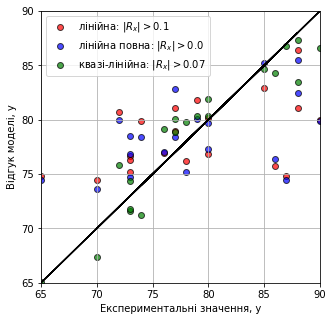

In [14]:
plt.figure(figsize=(5,5))
plt.plot(y, y, color='black', label='')

plt.scatter(y, regressor.predict(Xreduced), color="red", alpha=.7, edgecolor='black', label='лінійна: $|R_x| > 0.1$')
plt.scatter(y, regressor_full.predict(X), color="blue", alpha=.7, edgecolor='black', label='лінійна повна: $|R_x| > 0.0$')
plt.scatter(y, regressor_quasi.predict(Xnew_reduced), color="green", alpha=.7, edgecolor='black', label='квазі-лінійна: $|R_x| > 0.07$')

plt.legend()
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.xlabel('Експериментальні значення, y')
plt.ylabel('Відгук моделі, y')

### Висновки

Для отриманих даних недоцільно використовувати покроковий лінійний регресійний аналіз на вихідних факторах, оскільки відгуки моделі не корелюють з експериментальними даними.

Побудова квазі-лінійної регрессії за матрицею вихідних факторів та факторів взаємодій дає коефіціент кореляції 0.89. 